<a href="https://colab.research.google.com/github/grrddn/Analisis_Tasa_de_Mortalidad/blob/main/09_M%C3%B3dulo_24_Visualizaci%C3%B3n_de_Datos_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 24 - Visualización de Datos**

En este módulo, nos centraremos en la visualización de datos utilizando Python, Con un enfoque particular en las bibliotecas Seaborn y Matplotlib, integradas con Pandas. Exploraremos diversas técnicas y herramientas para crear gráficos que no solo sean informativas, sino también visualmente atractivas, facilitando el análisis y la interpretación de datos complejos

### **Introducción a Seaborn**

Descubre como Seaborn puede mejorar la prensentación gráfica de datos en comparación con las visualizaciones básicas de Pandas. Aprenderás a crear gráficos avanzados como los de violín, utiles para comparar tendencias y tomar decisiones empresariales.

### **Personalización de Gráficos**

Produnfiza en la personalización de gráficos,variando estilos y eliminando ejes para mejorar la claridad visual. Aprende a usar Matplotlib para enriquecer las visualizaciones con etiquetas, títulos  y paletas de colores adaptados a tus necesidades.

### **Técnicas Avanzadas de Visualización**

Explora técnicas avanzadas como los gráficos de franjas y enjambre, y aprende a utilizar gráficos de barras, puntos y mapas de colores para analizar correlaciones y patrones en los datos. Descubre como Facegrid y JointGrid pueden ayudarte a visualizar múltiples aspectos de los datos en una sola figura.

______

# **Análisis Preeliminar**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

drive.mount('/content/drive')
google_drive_url = 'https://docs.google.com/spreadsheets/d/1snLne_j4vy4osfegZp5K8o4LWF7pzhYz/edit?usp=sharing&ouid=115441328811399406771&rtpof=true&sd=true'
file_id = google_drive_url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(download_url)
response.raise_for_status()
from io import StringIO
df = pd.read_csv(StringIO(response.text))
display(df.head())

Mounted at /content/drive


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.shape

(1000, 8)

In [4]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [5]:
columnas = df.columns

for i in columnas:
  print('\n')
  print(i)
  print(df[i].unique())




gender
['female' 'male']


race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']


parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


lunch
['standard' 'free/reduced']


test preparation course
['none' 'completed']


math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]


reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]


writing score
[ 74  88  93 

## **Insights**

- Tenemos un DataFrame de 1000 registros con 8 columnas.
- Solo 3 columnas son valores numéricos.
- El DataFrame es de las calificaciones de un grupo estudiantil.
- Tenemos varios estudios o hipótesis que podríamos plantear.
  - ¿Tienen mejor calificación los estudiantes que fueron al curso de preparación?
  - ¿Tienen mejor calificación los estudiantes que tienen lunch reducido o los que tienen lunch estandar?
  - ¿Tienen mejores calificaciones los estudiantes cuyos padres tienen un mayor grado de estudio?


# **Seaborn**

## **Histograma con Pandas**

<Axes: ylabel='Frequency'>

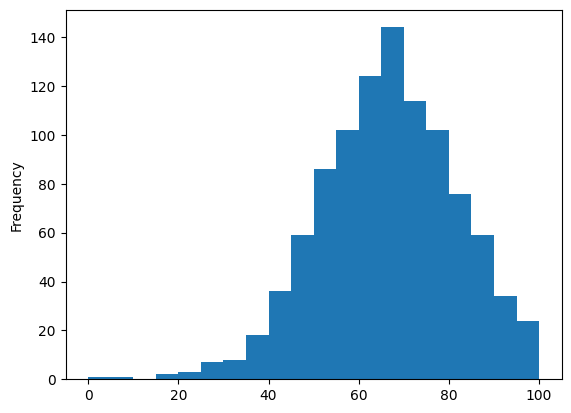

In [6]:
df['math score'].plot(kind='hist', bins=20)

## **Histograma con Matplotlib**

(array([  1.,   1.,   0.,   2.,   3.,   7.,   8.,  18.,  36.,  59.,  86.,
        102., 124., 144., 114., 102.,  76.,  59.,  34.,  24.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

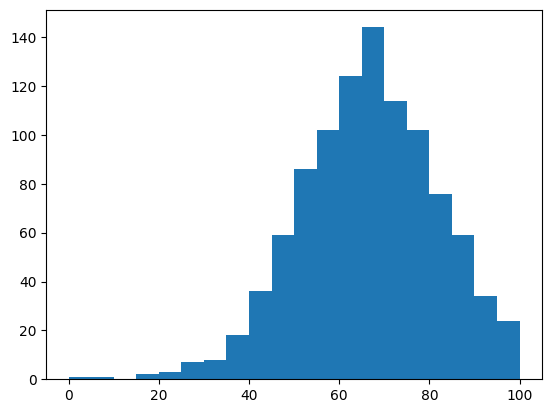

In [7]:
fig, ax = plt.subplots()
ax.hist(df['math score'], bins = 20)

## **Histograma con Seaborn**

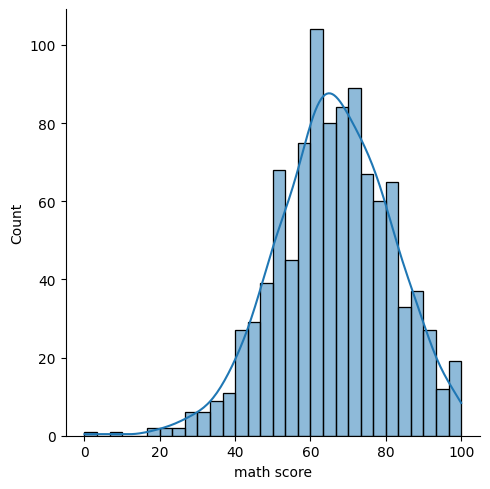

In [8]:
sns.displot(df['math score'], bins = 30, kde = True)

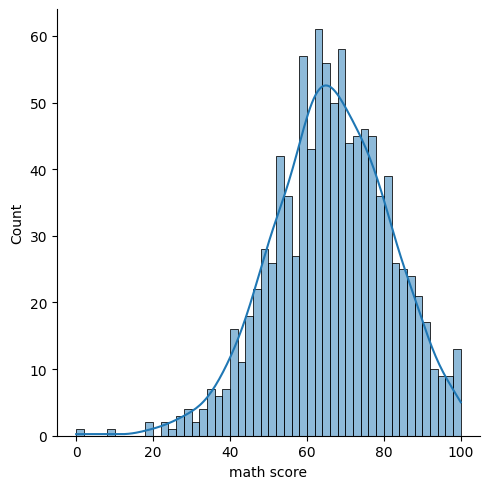

In [9]:
sns.displot(df['math score'], bins = 50, kde = True)

/tmp/ipython-input-1940153370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], bins = 30, hist = False)


<Axes: xlabel='math score', ylabel='Density'>

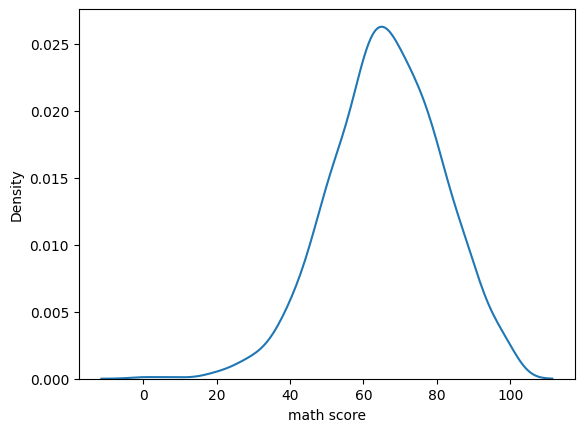

In [10]:
sns.distplot(df['math score'], bins = 30, hist = False)

<Axes: xlabel='math score', ylabel='Count'>

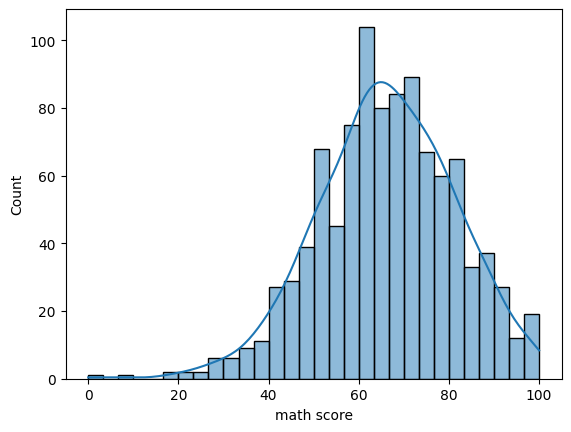

In [11]:
sns.histplot(df['math score'], bins = 30, kde = True)

## **Regplot con Seaborn**

<Axes: xlabel='math score', ylabel='reading score'>

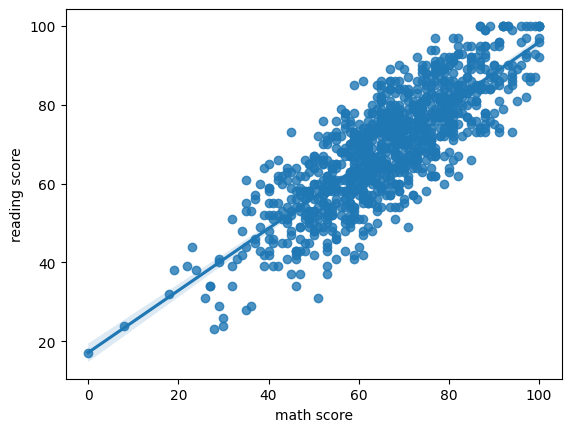

In [12]:
sns.regplot(x = 'math score', y = 'reading score', data = df)

<Axes: xlabel='math score', ylabel='reading score'>

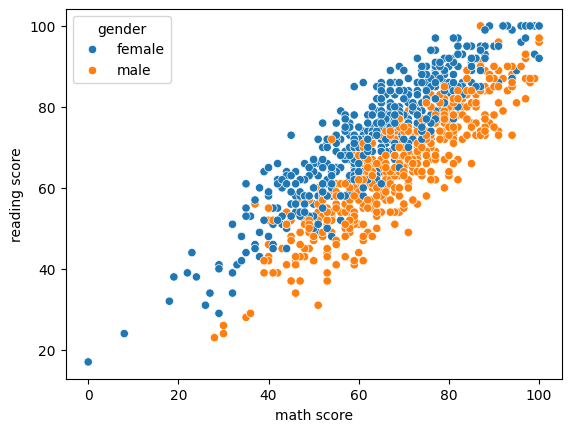

In [13]:
sns.scatterplot(x = 'math score', y = 'reading score', data = df, hue= 'gender')

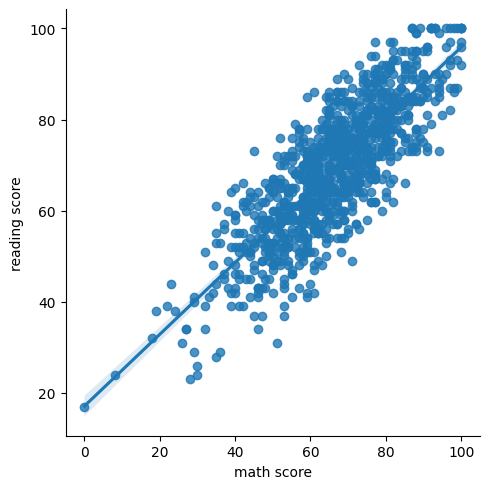

In [14]:
sns.lmplot(x = 'math score', y = 'reading score', data = df)

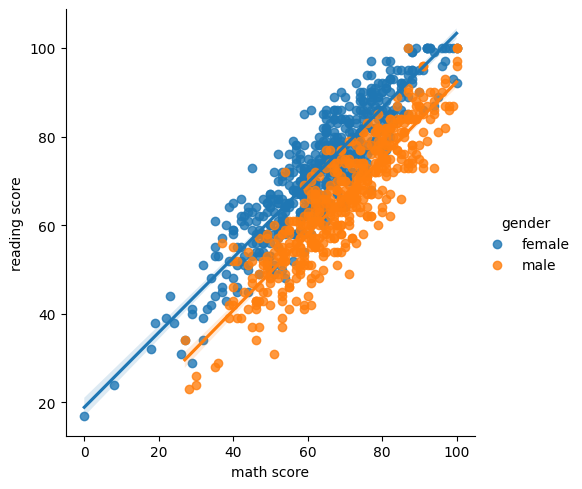

In [15]:
sns.lmplot(x = 'math score', y = 'reading score', data = df, hue = 'gender')

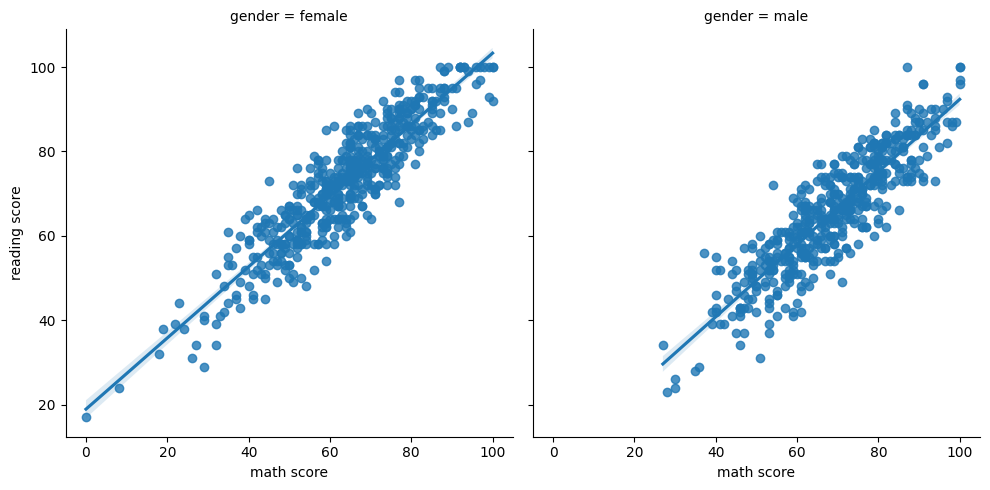

In [16]:
sns.lmplot(x = 'math score', y = 'reading score', data = df, col = 'gender')

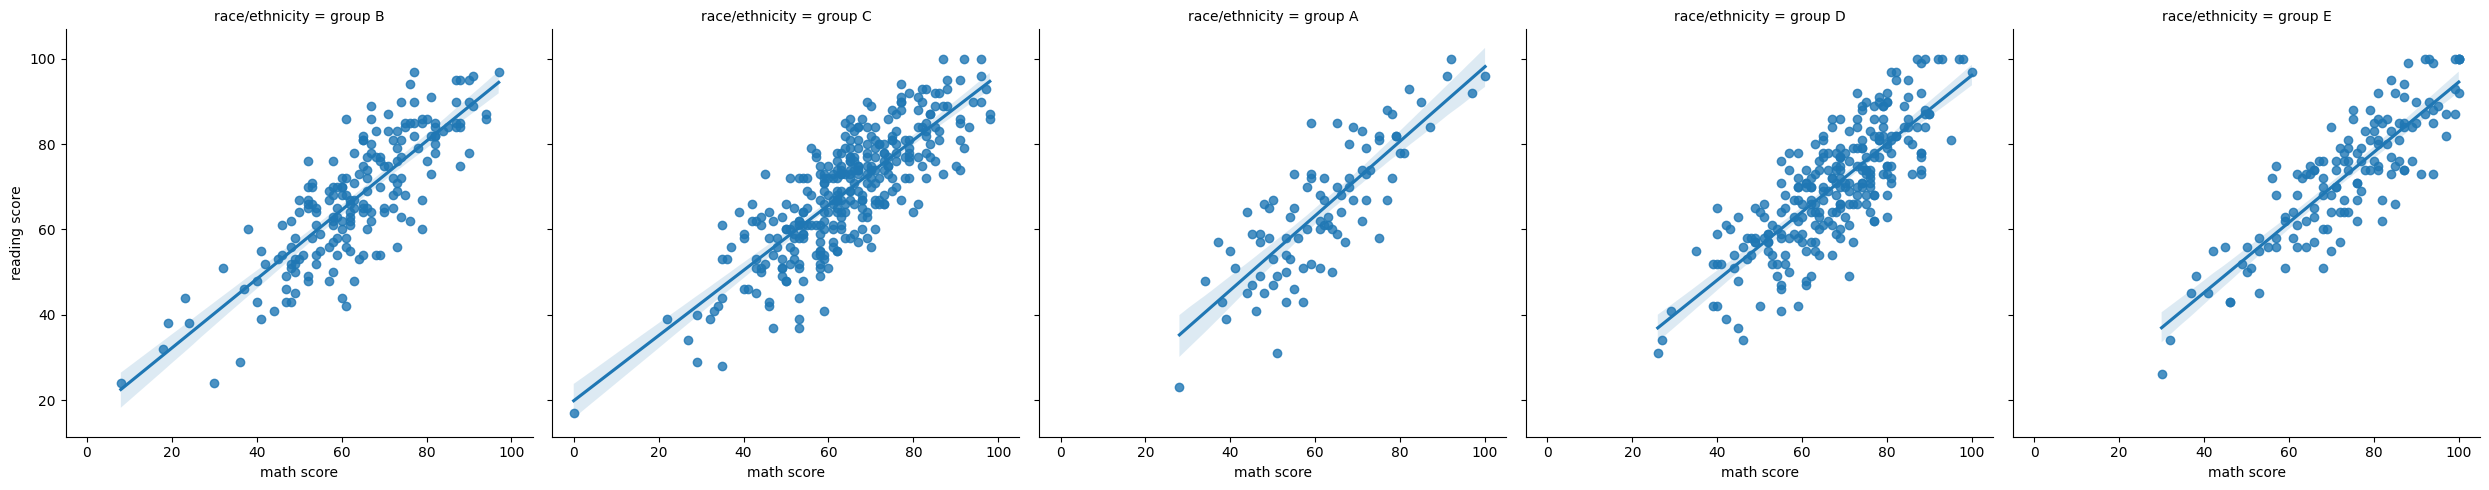

In [17]:
sns.lmplot(x = 'math score', y = 'reading score', data = df, col = 'race/ethnicity')

# **Personalización de gráficos Seaborn**

## **.set_style**

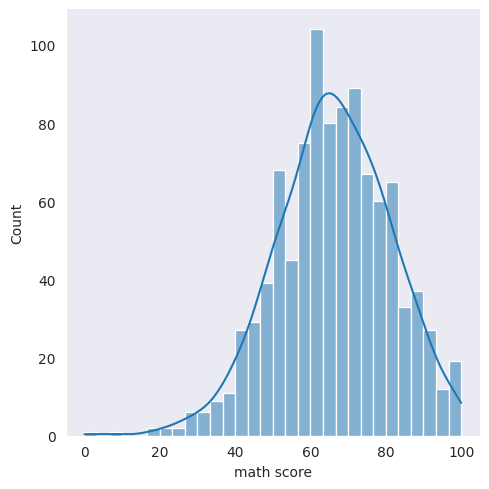

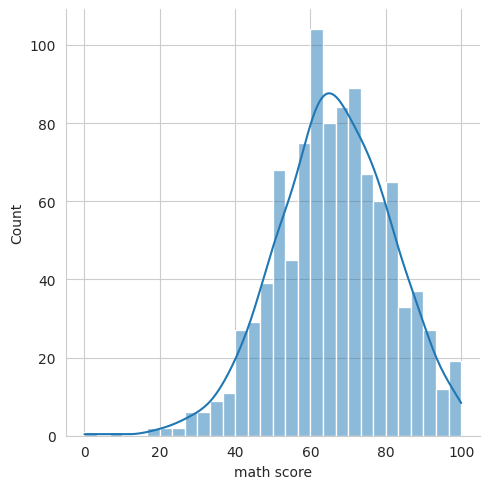

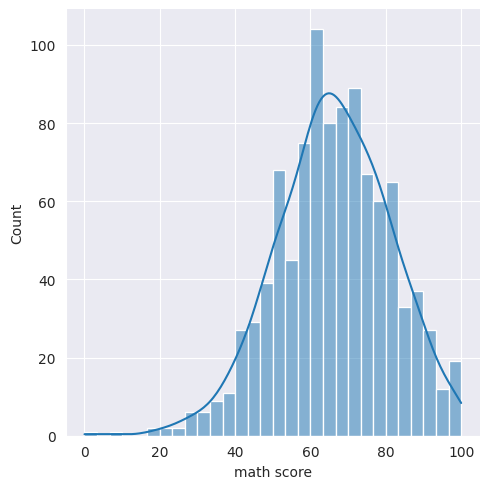

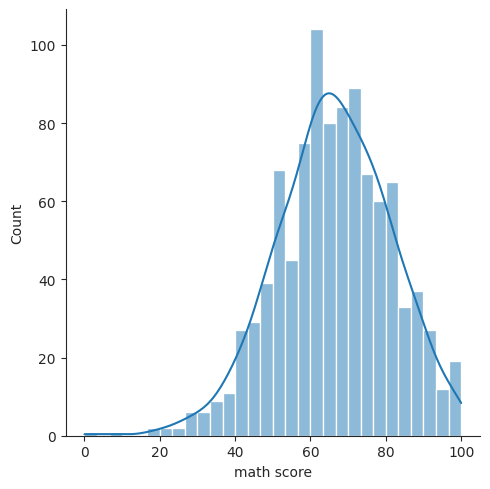

In [18]:
estilos = ['dark', 'whitegrid', 'darkgrid', 'ticks']

for i in estilos:
  sns.set_style(i)
  sns.displot(df['math score'], bins = 30, kde = True)

## **remover ejes**

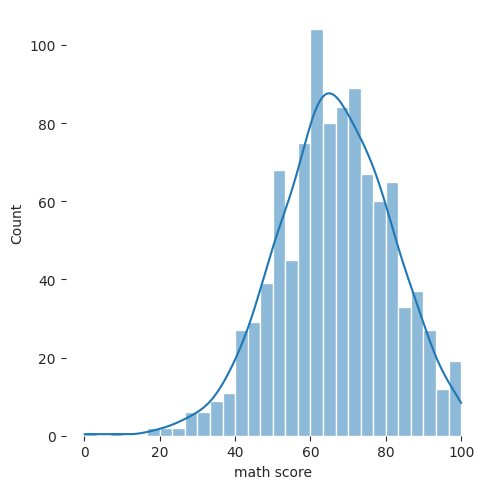

In [19]:
sns.set_style('ticks')
sns.displot(df['math score'], bins = 30, kde = True)
sns.despine(left=True, bottom=True)

## **Combinación de gráficos con matplotlib.pyplot**

<Axes: xlabel='math score', ylabel='Count'>

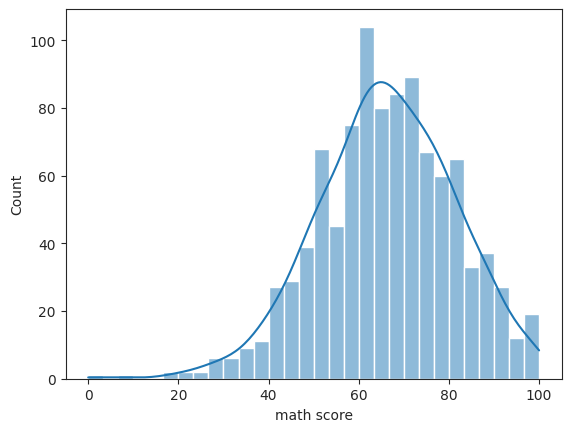

In [20]:
fig, ax = plt.subplots()
sns.histplot(df['math score'], bins = 30, kde = True, ax = ax)

/tmp/ipython-input-2696433775.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], bins = 30, kde = True, ax = ax)


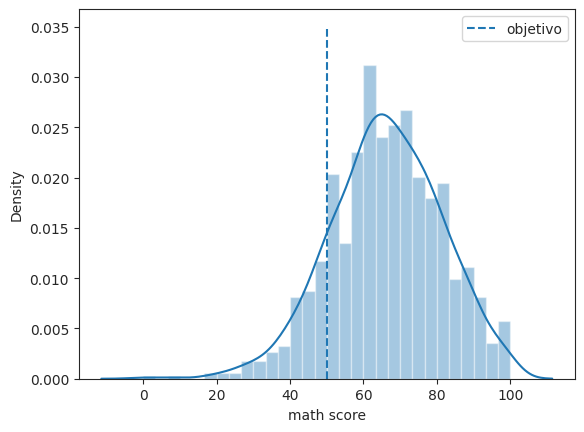

In [21]:
fig, ax = plt.subplots()
sns.distplot(df['math score'], bins = 30, kde = True, ax = ax)
ax.vlines(x = 50, label='objetivo', linestyles='--', ymin = 0, ymax = 0.035)
ax.legend()

## **Truncamiento de escala de visualización**

/tmp/ipython-input-3789545763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], bins = 30, kde = True, ax = ax)


[(0.0, 50.0), (0.0, 0.01)]

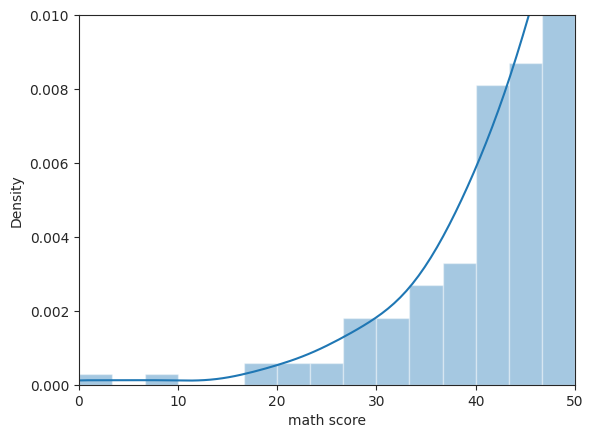

In [22]:
fig, ax = plt.subplots()
sns.distplot(df['math score'], bins = 30, kde = True, ax = ax)
ax.set(xlim = (0, 50), ylim = (0, 0.01))

/tmp/ipython-input-1062704559.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'], bins = 30, kde = True, ax = ax1)
/tmp/ipython-input-1062704559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('gender == "male"')['math score'], bins = 30, kde = True, ax = ax2)


[Text(0.5, 0, 'male')]

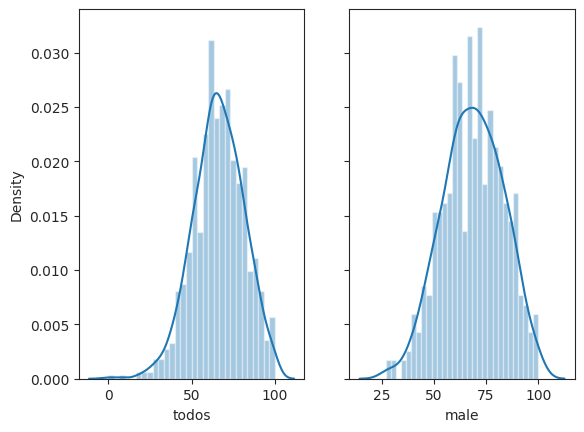

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey=True)
sns.distplot(df['math score'], bins = 30, kde = True, ax = ax1)
sns.distplot(df.query('gender == "male"')['math score'], bins = 30, kde = True, ax = ax2)
ax1.set(xlabel='todos')
ax2.set(xlabel='male')

## **Asignación de Colores**

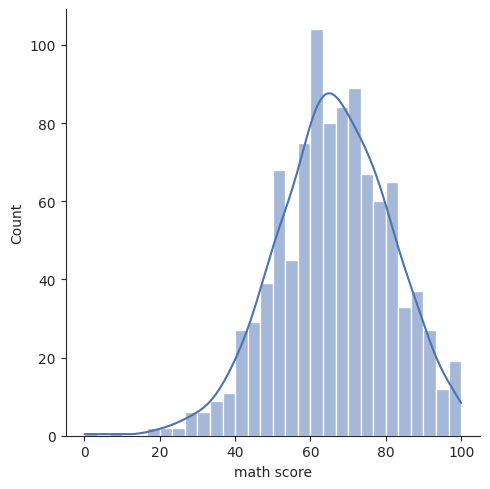

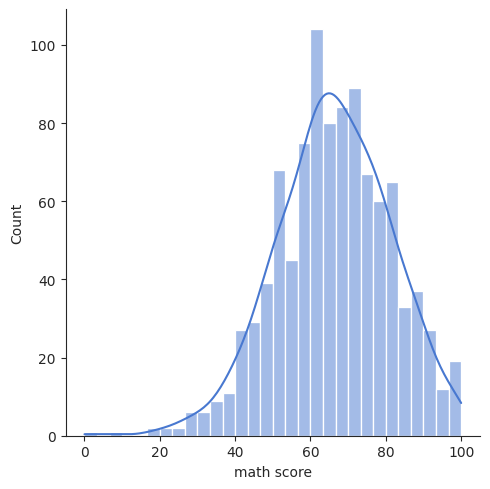

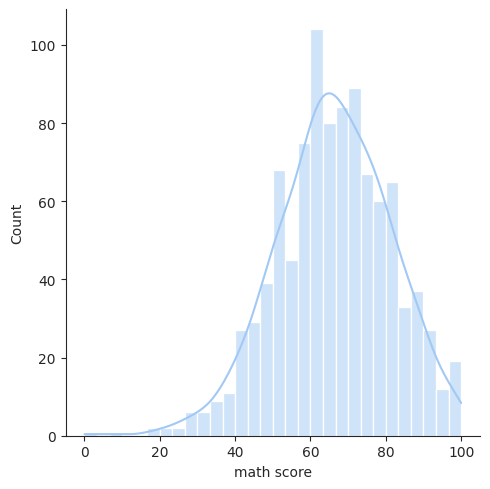

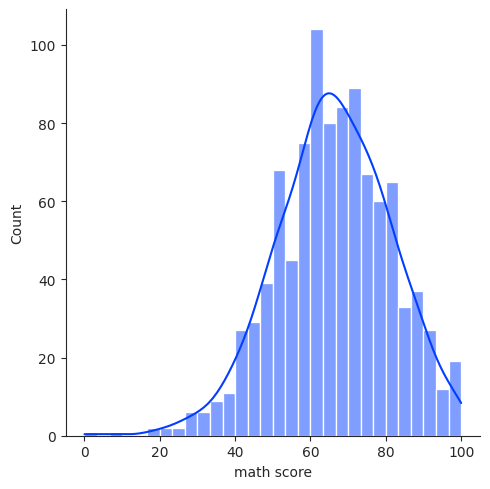

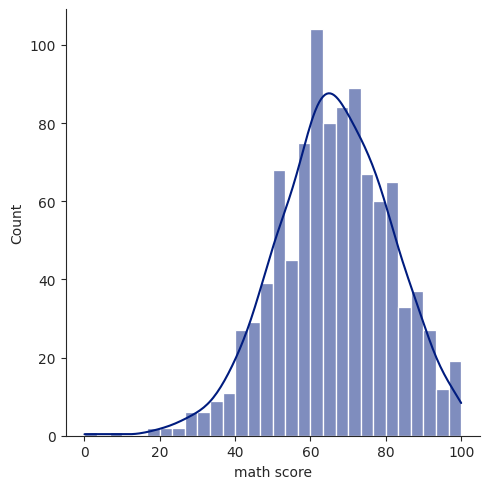

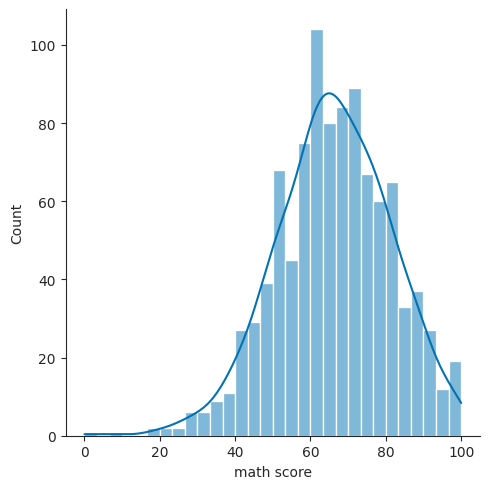

In [24]:
paleta= ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for i in paleta:
  sns.set_palette(i)
  sns.displot(df['math score'], bins = 30, kde = True)

# **Tipos adicionales de gráficos**

<Axes: xlabel='race/ethnicity', ylabel='math score'>

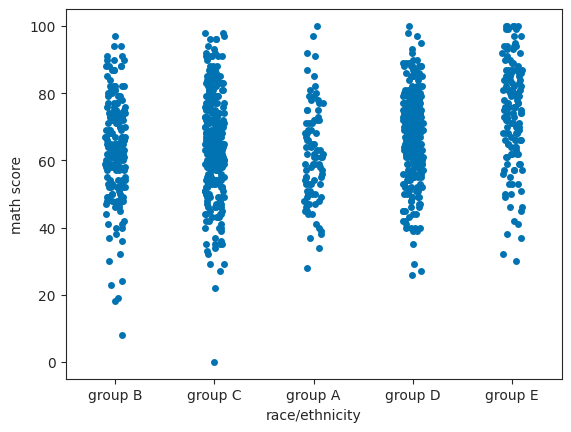

In [25]:
sns.stripplot(x = 'race/ethnicity', y = 'math score', data = df, jitter = True)

<Axes: xlabel='race/ethnicity', ylabel='math score'>

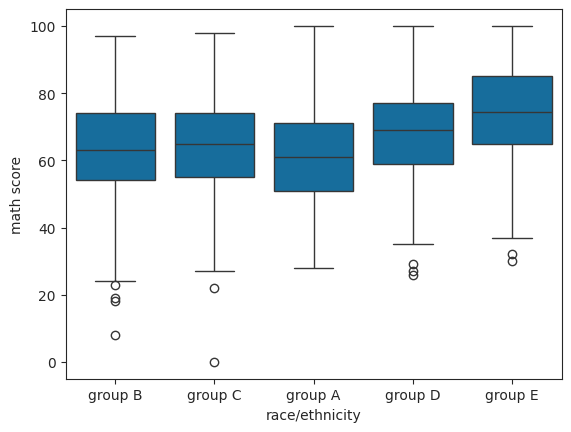

In [26]:
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = df)

<Axes: xlabel='race/ethnicity', ylabel='math score'>

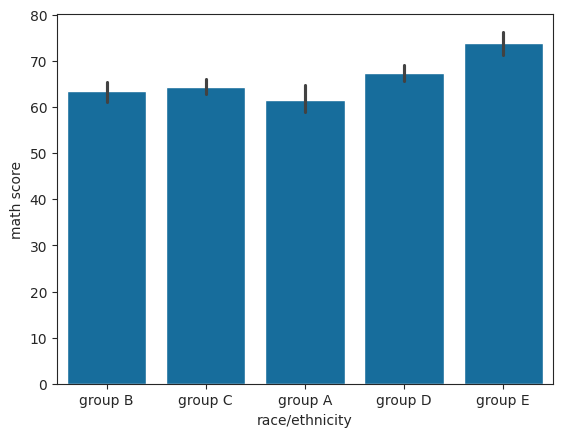

In [27]:
sns.barplot(x = 'race/ethnicity', y = 'math score', data = df)

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='race/ethnicity', ylabel='math score'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


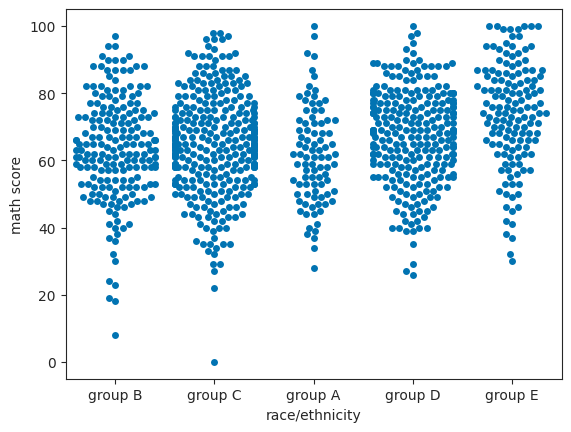

In [28]:
sns.swarmplot(x = 'race/ethnicity', y = 'math score', data = df)

<Axes: xlabel='race/ethnicity', ylabel='math score'>

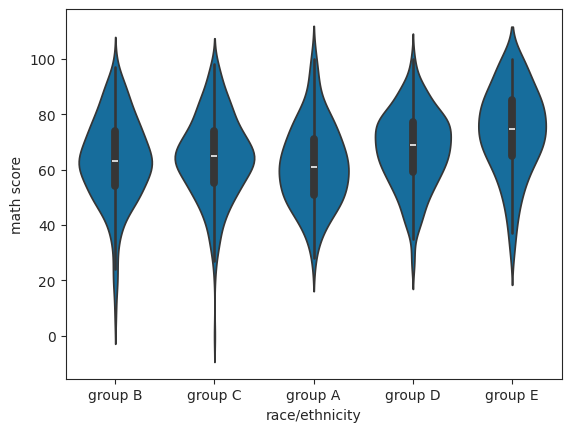

In [29]:
sns.violinplot(x = 'race/ethnicity', y = 'math score', data = df)

<Axes: xlabel='race/ethnicity', ylabel='count'>

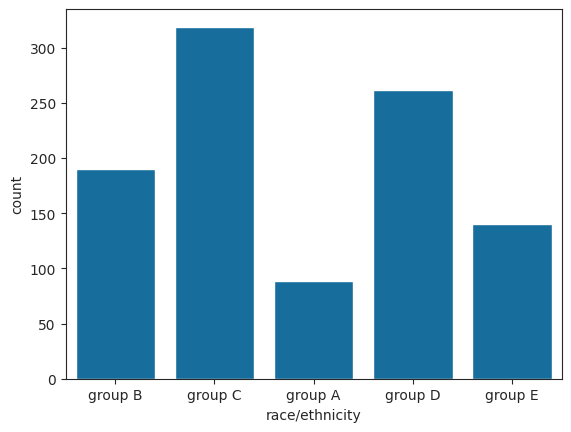

In [30]:
sns.countplot(x = 'race/ethnicity', data = df)

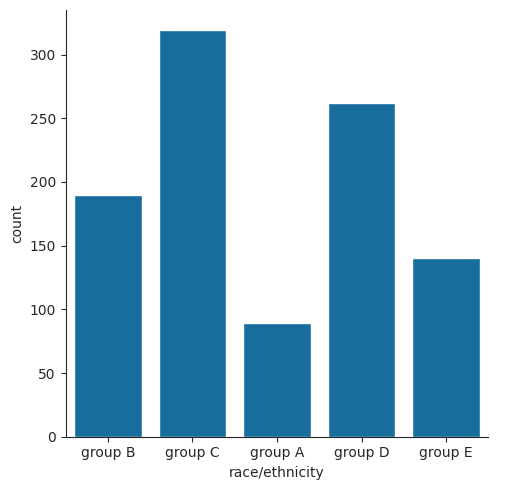

In [31]:
sns.catplot(x = 'race/ethnicity', kind = 'count', data = df)

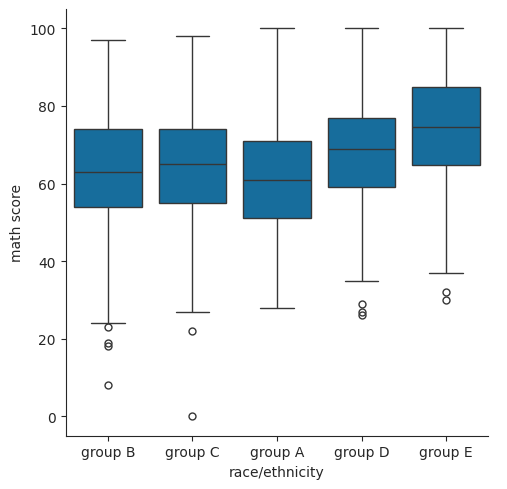

In [32]:
sns.catplot(x = 'race/ethnicity', y = 'math score', kind = 'box', data = df)

<Axes: xlabel='race/ethnicity', ylabel='math score'>

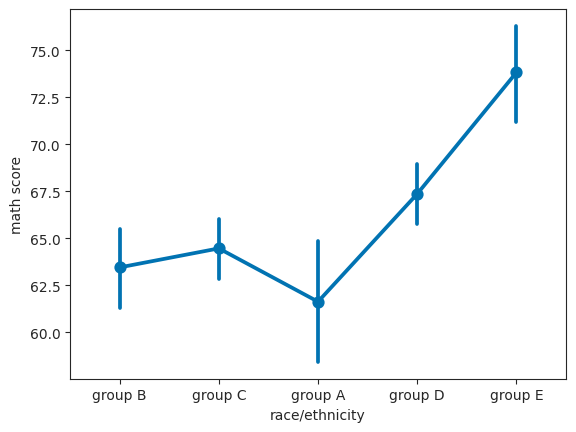

In [33]:
sns.pointplot(x = 'race/ethnicity', y = 'math score', data = df)

<Axes: xlabel='math score', ylabel='reading score'>

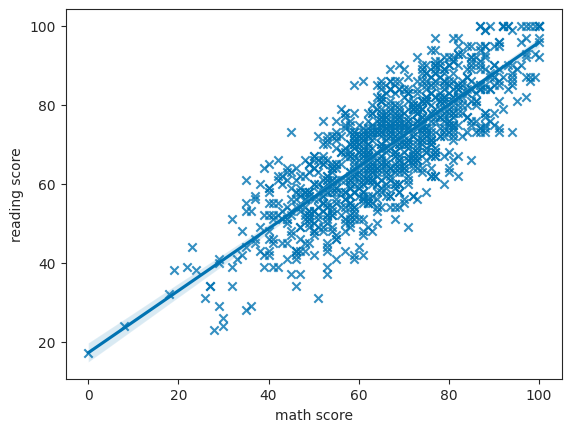

In [34]:
sns.regplot(x = 'math score', y = 'reading score', data = df, marker = 'x')

<Axes: >

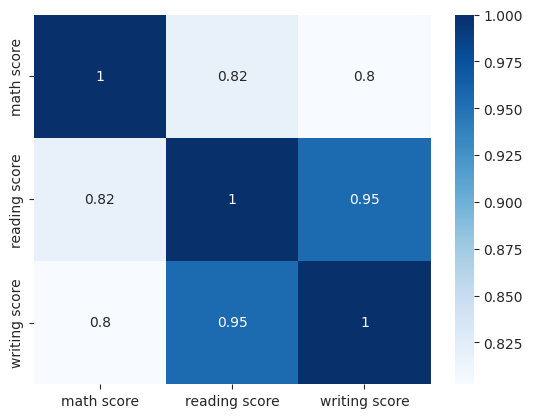

In [35]:
df_num = df.select_dtypes(include = 'number')
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')

____

# **GLOSARIO**

- **BoxPlot**

Un gráfico que muestra la distribución de datos basado en un resumen de cinco números: mínimo, primer cuartil, mediana, tercer cuartil y máximo. Es útil para identificar valores atípicos y la dispersión de los datos.

- **FaceGrid**

Una herramienta de seaborn que permite crear una matriz de gráficos, facilitando la visualización de múltiples variables categóricas en una sola figura.

- **Gráfico de Enjabre (Swarm Plot)**

Una tipo de gráfico que muestra la distribución de datos a través de puntos que no se superponen, proporcionando una representación clara de la densidad de los datos.

- **Gráficos de Franjas (Strip Plot)**

Un gráfico de representa datos individuales a lo largo de un eje, útil para visualizar la distribución de datos categóricos.

- **Joint Grid**

Una herramienta de seaborn que permite crear gráficos compuestos, combinando gráficos de dispersión con histogramas o gráficos de densidad para analizar la relación entre dos variables.

- **LV Plot (Letter Value Plot)**

Un gráfico que proporciona una visualización detallada de la concentración de valores en un conjunto de datos, similar al Box Plot pero con más información sobre la distribución.

- **Mapas de Calor**

Gráficos que utilizan una escala de colores para representar la intensidad de los valores en una matriz, comunmente usados para visualizar correlaciones entre variables.

- **Paletas de Seaborn**

Conjunto de colores predefinidos en Seaborn que permiten personalizar la apariencia de los gráficos para adaptarlos a diferentes necesidades etéticas.

- **Regplot**

Una función de Seaborn que crea gráficos de dispersión con líneas de regresión, permitiendo analizar la relación entre las dos variables continuas.

- **Violin Plot**

Un gráfico que combina características del Box Plot y el gráfico de densidad, mostrando la distribución de datos y su densidad en diferentes niveles de una variable categórica.

______

# **TAREA**

- Descargue el archivo CSV “SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv” de la siguiente página (que contiene información demográfica mundial).

- Mediante el uso de gráficos de su preferencia (de acuerdo a los diversos tipos discutidos en este módulo), muestre la relación que guardan la tasa de mortalidad infantil (infant mortality for both sexes) con la esperanza de vida para ambos sexos (life expectancy at birth for both sexes) para el año 2020.

- Asimismo, determine qué variables de esta base de datos se encuentran más correlacionadas en dicho año. Interprete sus resultados.

- Su evaluación en esta actividad dependerá del impacto visual y detalle que proyecten sus gráficos, así como de la explicación que aporte en sus observaciones.

In [36]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

drive.mount('/content/drive')
google_drive_url = 'https://drive.google.com/file/d/1M1wgu7eGtlfsXfRKyzcha4fE1dZhDTUZ/view?usp=sharing'
file_id = google_drive_url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
response = requests.get(download_url)
response.raise_for_status()
from io import StringIO
df = pd.read_csv(StringIO(response.text))
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,T03,Population growth and indicators of fertility and mortality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6757 entries, 0 to 6756
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   T03                                                          6757 non-null   object
 1   Population growth and indicators of fertility and mortality  6756 non-null   object
 2   Unnamed: 2                                                   6757 non-null   object
 3   Unnamed: 3                                                   6757 non-null   object
 4   Unnamed: 4                                                   6757 non-null   object
 5   Unnamed: 5                                                   2527 non-null   object
 6   Unnamed: 6                                                   6757 non-null   object
dtypes: object(7)
memory usage: 369.7+ KB


In [38]:
df.rename(columns= {'Unnamed: 2':'Year', 'Unnamed: 3': 'Series', 'Unnamed: 4':'Value', 'Unnamed: 5':'Footnotes', 'Unnamed: 6':'Source'}, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6757 entries, 0 to 6756
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   T03                                                          6757 non-null   object
 1   Population growth and indicators of fertility and mortality  6756 non-null   object
 2   Year                                                         6757 non-null   object
 3   Series                                                       6757 non-null   object
 4   Value                                                        6757 non-null   object
 5   Footnotes                                                    2527 non-null   object
 6   Source                                                       6757 non-null   object
dtypes: object(7)
memory usage: 369.7+ KB


In [40]:
df = df.drop(index=0)

In [41]:
df.head(3)

,T03,Population growth and indicators of fertility and mortality,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."


In [42]:
df.describe().T

,count,unique,top,freq
T03,6756,268,722,27
Population growth and indicators of fertility and mortality,6756,268,SIDS,27
Year,6756,4,2010,1816
Series,6756,7,Population annual rate of increase (percent),1019
Value,6756,1076,1.6,99
Footnotes,2526,81,Projected estimate (medium fertility variant).,1224
Source,6756,4,"United Nations Population Division, New York, ...",4064


In [43]:
df.nunique()

,0
T03,268
Population growth and indicators of fertility and mortality,268
Year,4
Series,7
Value,1076
Footnotes,81
Source,4


In [73]:
df['Series'].value_counts()

,count
Series,
Population annual rate of increase (percent),1019
Total fertility rate (children per women),1016
"Infant mortality for both sexes (per 1,000 live births)",1016
Life expectancy at birth for both sexes (years),1016
Life expectancy at birth for males (years),1016
Life expectancy at birth for females (years),1016
"Maternal mortality ratio (deaths per 100,000 population)",657


In [75]:
df.dtypes

,0
T03,object
Population growth and indicators of fertility and mortality,object
Year,object
Series,object
Value,object
Footnotes,object
Source,object


In [78]:
df['Value'] = df['Value'].str.replace(',', '', regex=True)   # quita comas
df['Value'] = df['Value'].str.strip()                        # quita espacios
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [82]:
df['T03'] = pd.to_numeric(df['T03'], errors='coerce')

In [83]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [84]:
df.dtypes

,0
T03,int64
Population growth and indicators of fertility and mortality,object
Year,int64
Series,object
Value,float64
Footnotes,object
Source,object


In [95]:
mortal_both_sexes = df[df['Series']=='Infant mortality for both sexes (per 1,000 live births)']

In [97]:
mbs = mortal_both_sexes

<Axes: >

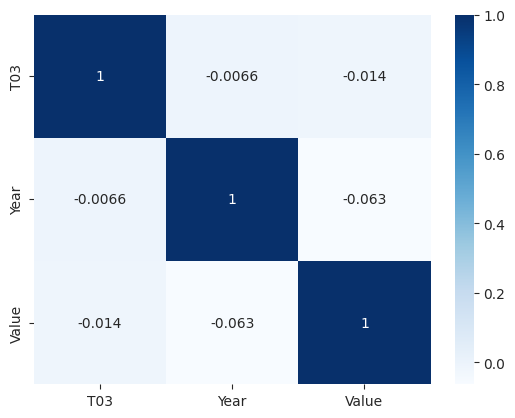

In [100]:
df_num = df.select_dtypes(include = 'number')
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')